# All pre-processing code taken from Nick Wan's notebook [here](https://www.kaggle.com/code/nickwan/calculate-distance-between-players-football)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist
from tqdm.notebook import tqdm

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-big-data-bowl-2024/players.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_7.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_9.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_6.csv
/kaggle/input/nfl-big-data-bowl-2024/games.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_8.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_4.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_3.csv
/kaggle/input/nfl-big-data-bowl-2024/tackles.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_5.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_1.csv
/kaggle/input/nfl-big-data-bowl-2024/plays.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_2.csv


In [2]:
project_dir = '/kaggle/input/nfl-big-data-bowl-2024'
os.listdir(project_dir)

['players.csv',
 'tracking_week_7.csv',
 'tracking_week_9.csv',
 'tracking_week_6.csv',
 'games.csv',
 'tracking_week_8.csv',
 'tracking_week_4.csv',
 'tracking_week_3.csv',
 'tackles.csv',
 'tracking_week_5.csv',
 'tracking_week_1.csv',
 'plays.csv',
 'tracking_week_2.csv']

In [3]:
players = pd.read_csv(f"{project_dir}/players.csv")

week = pd.read_csv(f"{project_dir}/tracking_week_1.csv")

week = week.merge(players.loc[:,['nflId','position']],how='left')
week.shape

(1407439, 18)

In [4]:
gid = 2022091103
game = week.loc[week['gameId'] == gid].copy()
game.shape

(91080, 18)

In [5]:
df = pd.DataFrame()
for pid in tqdm(game['playId'].unique(),leave=True):
    play = game.loc[game['playId'] == pid].copy()
    
    for fid in tqdm(play['frameId'].unique(),leave=False):
        frame = play.loc[play['frameId'] == fid].copy()
        frame['pos_unique'] = (frame['position']
                              .add(frame
                                   .groupby('position',as_index=False)
                                  .cumcount()
                                  .add(1)
                                  .dropna()
                                  .astype(str)
                                  .str.replace('.0','',regex=False)
                                  .str.replace('0','',regex=False)))
    
        _df = (pd.DataFrame(cdist(frame.loc[:,['x','y']],
                                 frame.loc[:,['x','y']]),
                           index=frame['nflId'],
                           columns=frame['pos_unique'].fillna('football')))
    
        _df = _df.reset_index()
    
        frame = frame.merge(_df)
    
        df = pd.concat([df,frame])

  0%|          | 0/102 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/73 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/68 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

In [6]:
df.columns

Index(['gameId', 'playId', 'nflId', 'displayName', 'frameId', 'time',
       'jerseyNumber', 'club', 'playDirection', 'x', 'y', 's', 'a', 'dis', 'o',
       'dir', 'event', 'position', 'pos_unique', 'CB1', 'SS1', 'NT1', 'CB2',
       'QB1', 'CB3', 'DE1', 'G1', 'FS1', 'DT1', 'DE2', 'T1', 'C1', 'WR1',
       'OLB1', 'WR2', 'ILB1', 'G2', 'RB1', 'TE1', 'T2', 'WR3', 'football',
       'DT2', 'ILB2', 'OLB2', 'FS2', 'FB1', 'NT2', 'TE2', 'T3', 'SS2', 'G3',
       'DE3', 'CB4'],
      dtype='object')

In [7]:
df.loc[:,['gameId','playId','nflId','displayName','frameId','pos_unique','QB1','WR3','football','o','dir']].sample(20)

,gameId,playId,nflId,displayName,frameId,pos_unique,QB1,WR3,football,o,dir
9,2022091103,2037,46138.0,B.J. Hill,41,DT1,10.803897,NaN,8.025883,111.87,170.32
21,2022091103,743,53557.0,Dan Moore,23,T2,9.217386,12.847233,5.348832,106.92,29.16
11,2022091103,2670,46080.0,Minkah Fitzpatrick,30,FS1,24.635592,13.789685,7.031564,3.90,180.56
9,2022091103,2931,44886.0,Chris Wormley,9,DE1,3.284022,15.167811,14.824500,149.54,113.38
18,2022091103,632,52441.0,Tee Higgins,7,WR2,19.893823,21.944658,19.980342,259.61,238.68
19,2022091103,364,52510.0,Alex Highsmith,33,OLB2,2.560176,43.993963,30.665817,323.00,299.14
19,2022091103,3294,53434.0,Ja'Marr Chase,29,WR3,24.457451,0.000000,20.715360,95.39,119.62
1,2022091103,3779,43325.0,Myles Jack,9,ILB1,26.357126,4.388804,16.337662,331.95,20.45
9,2022091103,364,45395.0,Arthur Maulet,32,CB3,36.335729,8.657973,11.344162,12.99,357.20
10,2022091103,520,46146.0,Sam Hubbard,21,DE2,5.741707,14.420936,5.207533,236.56,359.96


In [8]:
df.loc[:,['displayName','frameId','pos_unique','CB1', 'SS1', 'NT1', 'CB2',
       'QB1', 'CB3', 'DE1', 'G1', 'FS1', 'DT1', 'DE2', 'T1', 'C1', 'WR1',
       'OLB1', 'WR2', 'ILB1', 'G2', 'RB1', 'TE1', 'T2', 'WR3', 'football',
       'DT2', 'ILB2', 'OLB2', 'FS2', 'FB1', 'NT2', 'TE2', 'T3', 'SS2', 'G3',
       'DE3', 'CB4','football']].sample(20)

,displayName,frameId,pos_unique,CB1,SS1,NT1,CB2,QB1,CB3,DE1,...,FS2,FB1,NT2,TE2,T3,SS2,G3,DE3,CB4,football
1,La'el Collins,15,T1,26.598383,18.480468,NaN,35.869604,6.874242,27.032784,NaN,...,36.515252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.917835
18,Logan Wilson,47,ILB1,5.892113,5.991035,1.222497,13.335640,11.003072,5.363022,3.691409,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.398497
9,Cameron Sutton,26,CB2,22.285574,15.327599,NaN,0.000000,13.549380,8.950938,14.416133,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.019340
14,Alex Cappa,32,G1,19.011786,18.398918,NaN,3.591727,6.685163,13.617654,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.106434
12,Alex Cappa,1,G1,21.566089,8.989516,2.233428,NaN,1.534438,NaN,NaN,...,NaN,NaN,NaN,4.386342,NaN,9.401585,3.102725,NaN,NaN,1.726989
7,Chris Wormley,41,DE1,27.581008,6.468176,NaN,19.434117,17.029962,5.564396,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.499709
16,Drew Sample,1,TE1,23.485493,11.774264,NaN,8.237506,6.188093,14.040132,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.793100
9,Minkah Fitzpatrick,35,FS1,6.531723,23.533232,10.867290,6.426173,22.361657,27.432916,7.953873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.912401
1,Tyler Boyd,30,WR1,10.810666,25.171750,NaN,25.592259,14.989453,6.419984,18.246123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.719839
15,Jonah Williams,13,T2,24.917137,1.942498,NaN,18.612259,3.806127,26.075515,NaN,...,35.340051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.994525


In [9]:
tackles = pd.read_csv(f"{project_dir}/tackles.csv")
tackles = tackles.drop(columns={'forcedFumble'})
tackles['tackle'].value_counts()

tackle
1    9919
0    7507
Name: count, dtype: int64

In [10]:
df = df.merge(tackles,on=['gameId','playId','nflId'],how='left')
df.shape

(91080, 57)

In [11]:
df.loc[:,['displayName','playId','frameId','pos_unique','CB1', 'SS1', 'NT1', 'CB2','QB1', 'CB3', 'DE1', 'G1', 'FS1', 'DT1', 'DE2', 'T1', 'C1', 'WR1',
       'OLB1', 'WR2', 'ILB1', 'G2', 'RB1', 'TE1', 'T2', 'WR3', 'football',
       'DT2', 'ILB2', 'OLB2', 'FS2', 'FB1', 'NT2', 'TE2', 'T3', 'SS2', 'G3',
       'DE3', 'CB4','football','tackle','assist','pff_missedTackle']].sample(20)

,displayName,playId,frameId,pos_unique,CB1,SS1,NT1,CB2,QB1,CB3,...,TE2,T3,SS2,G3,DE3,CB4,football,tackle,assist,pff_missedTackle
39233,Joe Burrow,1700,34,QB1,13.554431,4.912321,5.644289,6.601189,0.000000,6.691106,...,NaN,NaN,NaN,NaN,NaN,NaN,5.031151,NaN,NaN,NaN
34431,Cameron Heyward,1589,19,DT1,14.242391,17.599071,NaN,9.095273,5.534266,5.205776,...,NaN,NaN,NaN,NaN,NaN,NaN,5.021954,NaN,NaN,NaN
28175,Cameron Heyward,1336,10,DT1,25.217853,18.330535,11.710141,43.269731,1.222007,NaN,...,16.230998,NaN,NaN,NaN,NaN,NaN,17.571179,NaN,NaN,NaN
64321,Germaine Pratt,3105,42,OLB1,16.444604,21.996102,2.085402,3.061634,15.040402,4.171055,...,NaN,NaN,NaN,NaN,NaN,NaN,2.917347,0.0,0.0,1.0
1516,George Pickens,111,33,WR3,46.563931,37.835565,27.626315,23.599646,31.833649,2.539311,...,NaN,NaN,NaN,NaN,NaN,NaN,48.774790,NaN,NaN,NaN
45052,Joe Burrow,2172,14,QB1,38.187393,18.596521,NaN,26.820636,0.000000,26.423393,...,NaN,NaN,NaN,NaN,NaN,NaN,19.484527,NaN,NaN,NaN
1713,Minkah Fitzpatrick,253,3,FS1,8.335682,16.541623,NaN,22.499656,17.930945,8.746611,...,NaN,NaN,NaN,NaN,NaN,NaN,14.250983,0.0,1.0,0.0
37518,Ted Karras,1672,33,C1,20.068844,3.216722,3.745931,NaN,7.501213,NaN,...,4.940162,NaN,6.000867,3.088721,NaN,NaN,5.251020,NaN,NaN,NaN
12211,Cordell Volson,632,47,G2,21.033369,2.146672,NaN,14.016437,18.119255,1.360147,...,NaN,NaN,NaN,NaN,NaN,NaN,2.106230,NaN,NaN,NaN
46071,Myles Jack,2201,25,ILB1,20.569883,3.268914,NaN,5.179044,5.979941,NaN,...,4.152168,NaN,NaN,NaN,NaN,NaN,5.899575,NaN,NaN,NaN


In [12]:
df['tackle'].value_counts()

tackle
1.0    3062
0.0    2648
Name: count, dtype: int64

In [13]:
def create_field_plot():
    fig,ax = plt.subplots()
    ax.set_xlim([0,120]),
    ax.set_ylim([0,53.3])
    ax.set_facecolor('green')
    ax.axvline(x=10,color='white')
    ax.axvline(x=20,color='white')
    ax.axvline(x=30,color='white')
    ax.axvline(x=40,color='white')
    ax.axvline(x=50,color='white')
    ax.axvline(x=60,color='white')
    ax.axvline(x=70,color='white')
    ax.axvline(x=80,color='white')
    ax.axvline(x=90,color='white')
    ax.axvline(x=100,color='white')
    ax.axvline(x=110,color='white')
    ax.fill_between(x=[0,10],y1=0,y2=53.3,color='white')
    ax.fill_between(x=[110,120],y1=0,y2=53.3,color='white')
    sns.despine()
    plt.show()

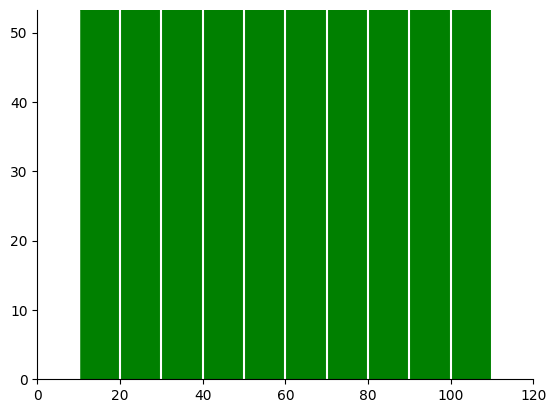

In [14]:
create_field_plot()

In [15]:
df['playId'].sample(10)

60851    2955
26593    1249
54049    2511
26563    1249
677        82
49024    2291
20456    1016
33866    1565
30373    1384
46572    2201
Name: playId, dtype: int64

In [16]:
defensive_players = ['CB1','SS1','NT1','CB2','CB3','DE1','G1', 'FS1','DT1', 'DE2','T1','OLB1','ILB1','G2','T2','DT2','ILB2','OLB2','FS2','NT2','T3','SS2','G3','DE3','CB4']
df.loc[:,'is_defense'] = 0
df.loc[df['pos_unique'].isin(defensive_players),'is_defense'] = 1
df[['pos_unique','is_defense']].head(20)

,pos_unique,is_defense
0,CB1,1
1,SS1,1
2,NT1,1
3,CB2,1
4,QB1,0
5,CB3,1
6,DE1,1
7,G1,1
8,FS1,1
9,DT1,1


In [17]:
df['event'].value_counts()

event
tackle                 1909
first_contact          1794
pass_outcome_caught    1150
pass_arrived           1058
handoff                1035
ball_snap              1011
out_of_bounds           368
run                     184
man_in_motion           161
pass_shovel              23
touchdown                23
shift                    23
pass_forward             23
fumble                   23
qb_slide                 23
autoevent_ballsnap        1
Name: count, dtype: int64

In [18]:
df.loc[df['playId']==58,['pos_unique','event']]

,pos_unique,event
0,CB1,pass_shovel
1,SS1,pass_shovel
2,NT1,pass_shovel
3,CB2,pass_shovel
4,QB1,pass_shovel
...,...,...
478,RB1,NaN
479,TE1,NaN
480,T2,NaN
481,WR3,NaN


In [19]:
plays = pd.read_csv(f"{project_dir}/plays.csv")
plays.head()

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,...,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,...,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,...,0.160485,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,...,0.756661,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,...,0.620552,0.379448,-0.002451,0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,...,0.836290,0.163710,0.001053,-0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN


In [20]:
test = df.merge(plays,on=['gameId','playId'],how='left')
test.head()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,...,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022091103,58,43299.0,Eli Apple,1,2022-09-11 13:04:14.200000,20.0,CIN,right,37.48,...,0.777446,0.222554,0.007068,-0.007068,1.298699,-0.472126,NaN,NaN,NaN,NaN
1,2022091103,58,43350.0,Vonn Bell,1,2022-09-11 13:04:14.200000,24.0,CIN,right,42.74,...,0.777446,0.222554,0.007068,-0.007068,1.298699,-0.472126,NaN,NaN,NaN,NaN
2,2022091103,58,43455.0,D.J. Reader,1,2022-09-11 13:04:14.200000,98.0,CIN,right,36.64,...,0.777446,0.222554,0.007068,-0.007068,1.298699,-0.472126,NaN,NaN,NaN,NaN
3,2022091103,58,43641.0,Mike Hilton,1,2022-09-11 13:04:14.200000,21.0,CIN,right,38.08,...,0.777446,0.222554,0.007068,-0.007068,1.298699,-0.472126,NaN,NaN,NaN,NaN
4,2022091103,58,44814.0,Mitchell Trubisky,1,2022-09-11 13:04:14.200000,10.0,PIT,right,30.05,...,0.777446,0.222554,0.007068,-0.007068,1.298699,-0.472126,NaN,NaN,NaN,NaN


In [21]:
test['playType'] = 0
test.loc[test['playDescription'].str.contains('pass'),'playType'] = 'pass'
test.loc[test['playDescription'].str.contains('scramble'),'playType'] = 'scramble'
test.loc[~((test['playDescription'].str.contains('pass')) | (test['playDescription'].str.contains('scramble'))),'playType'] = 'run'
test[['playDescription','playType']].sample(50)
test.groupby('playType',as_index=False)['prePenaltyPlayResult'].describe()


,playType,count,mean,std,min,25%,50%,75%,max
0,pass,30820.0,10.909701,8.671593,0.0,5.0,9.0,14.0,32.0
1,run,53774.0,4.083405,6.179950,-4.0,1.0,3.0,5.0,31.0
2,scramble,6486.0,9.333333,7.239800,2.0,5.0,6.0,9.0,23.0


In [22]:
(test.loc[test['prePenaltyPlayResult']<0].shape[0])/test.shape[0]

0.075

In [23]:
(test.loc[(test['prePenaltyPlayResult']<0) & (test['playType'] == 'pass')].shape[0])/test.loc[test['playType']=='pass'].shape[0]

0.0

In [24]:
(test.loc[(test['prePenaltyPlayResult']<0) & (test['playType'] == 'run')].shape[0])/test.loc[test['playType']=='run'].shape[0]

0.1270316509837468

In [25]:
(test.loc[(test['prePenaltyPlayResult']<0) & (test['playType'] == 'scramble')].shape[0])/test.loc[test['playType']=='scramble'].shape[0]

0.0

In [26]:
test.columns

Index(['gameId', 'playId', 'nflId', 'displayName', 'frameId', 'time',
       'jerseyNumber', 'club', 'playDirection', 'x', 'y', 's', 'a', 'dis', 'o',
       'dir', 'event', 'position', 'pos_unique', 'CB1', 'SS1', 'NT1', 'CB2',
       'QB1', 'CB3', 'DE1', 'G1', 'FS1', 'DT1', 'DE2', 'T1', 'C1', 'WR1',
       'OLB1', 'WR2', 'ILB1', 'G2', 'RB1', 'TE1', 'T2', 'WR3', 'football',
       'DT2', 'ILB2', 'OLB2', 'FS2', 'FB1', 'NT2', 'TE2', 'T3', 'SS2', 'G3',
       'DE3', 'CB4', 'tackle', 'assist', 'pff_missedTackle', 'is_defense',
       'ballCarrierId', 'ballCarrierDisplayName', 'playDescription', 'quarter',
       'down', 'yardsToGo', 'possessionTeam', 'defensiveTeam', 'yardlineSide',
       'yardlineNumber', 'gameClock', 'preSnapHomeScore',
       'preSnapVisitorScore', 'passResult', 'passLength', 'penaltyYards',
       'prePenaltyPlayResult', 'playResult', 'playNullifiedByPenalty',
       'absoluteYardlineNumber', 'offenseFormation', 'defendersInTheBox',
       'passProbability', 'preSnapHo

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


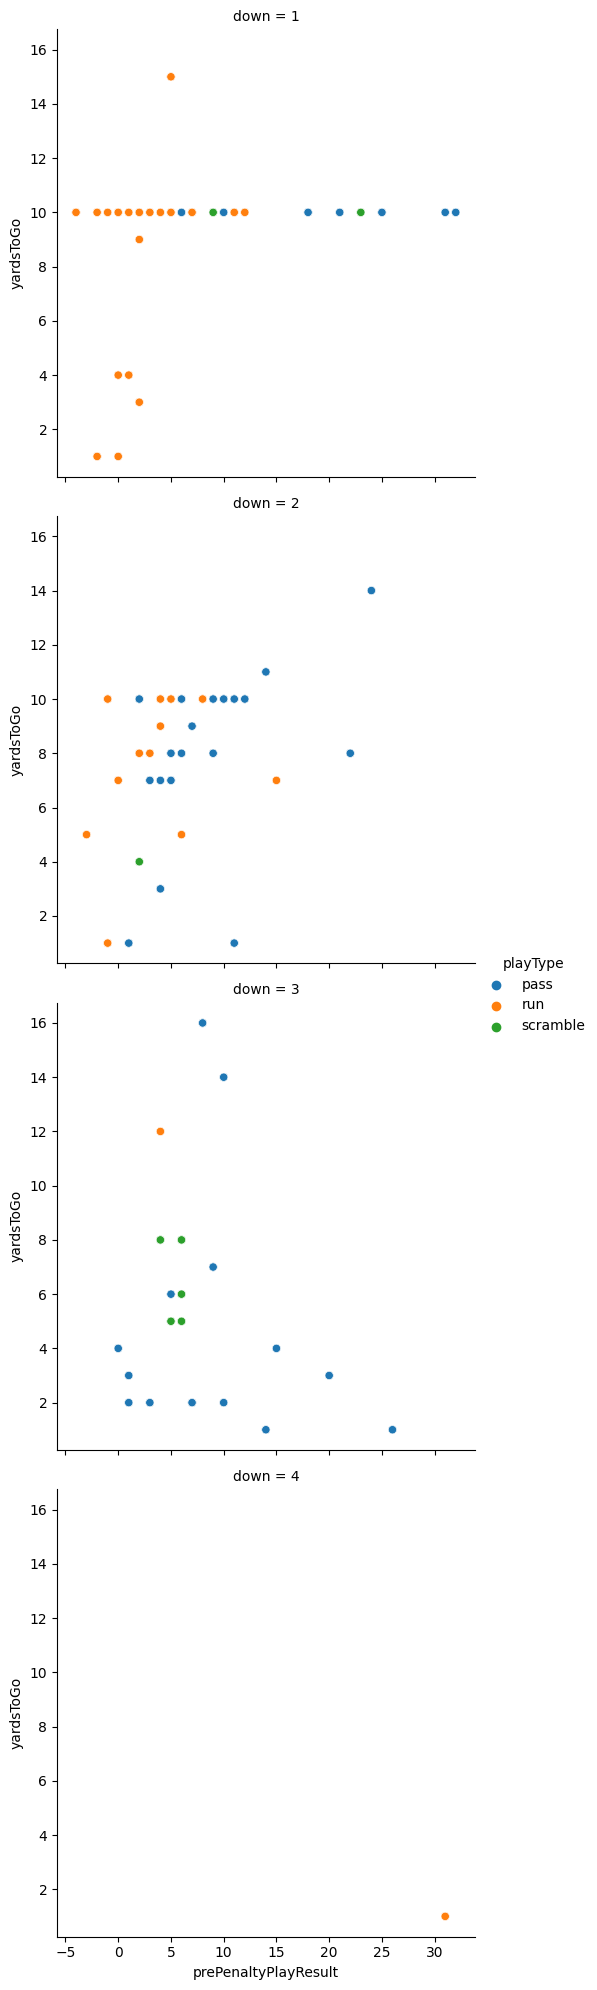

In [27]:
sns.relplot(data=test,x='prePenaltyPlayResult',y='yardsToGo',hue='playType',row='down')

In [28]:
dropped_columns = ['time','jerseyNumber','club','possessionTeam','defensiveTeam','yardlineSide','yardlineNumber','preSnapHomeScore','preSnapVisitorScore','passResult','passLength','penaltyYards','playResult','passProbability','preSnapHomeTeamWinProbability','preSnapVisitorTeamWinProbability','homeTeamWinProbabilityAdded','expectedPoints','expectedPointsAdded','foulName1','foulName2','foulNFLId1','foulNFLId2']
test.drop(labels=dropped_columns,axis=1,inplace=True)
test.columns

Index(['gameId', 'playId', 'nflId', 'displayName', 'frameId', 'playDirection',
       'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'event', 'position',
       'pos_unique', 'CB1', 'SS1', 'NT1', 'CB2', 'QB1', 'CB3', 'DE1', 'G1',
       'FS1', 'DT1', 'DE2', 'T1', 'C1', 'WR1', 'OLB1', 'WR2', 'ILB1', 'G2',
       'RB1', 'TE1', 'T2', 'WR3', 'football', 'DT2', 'ILB2', 'OLB2', 'FS2',
       'FB1', 'NT2', 'TE2', 'T3', 'SS2', 'G3', 'DE3', 'CB4', 'tackle',
       'assist', 'pff_missedTackle', 'is_defense', 'ballCarrierId',
       'ballCarrierDisplayName', 'playDescription', 'quarter', 'down',
       'yardsToGo', 'gameClock', 'prePenaltyPlayResult',
       'playNullifiedByPenalty', 'absoluteYardlineNumber', 'offenseFormation',
       'defendersInTheBox', 'visitorTeamWinProbilityAdded', 'playType'],
      dtype='object')

In [29]:
test.loc[test['prePenaltyPlayResult'] <0].head()

,gameId,playId,nflId,displayName,frameId,playDirection,x,y,s,a,...,down,yardsToGo,gameClock,prePenaltyPlayResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,visitorTeamWinProbilityAdded,playType
13915,2022091103,764,43350.0,Vonn Bell,1,right,114.44,24.20,4.2,2.43,...,2,1,3:14,-1,N,109,JUMBO,11.0,-0.041647,run
13916,2022091103,764,43455.0,D.J. Reader,1,right,109.15,23.14,0.0,0.00,...,2,1,3:14,-1,N,109,JUMBO,11.0,-0.041647,run
13917,2022091103,764,43487.0,Derek Watt,1,right,104.34,24.19,0.0,0.00,...,2,1,3:14,-1,N,109,JUMBO,11.0,-0.041647,run
13918,2022091103,764,44814.0,Mitchell Trubisky,1,right,107.23,24.20,0.0,0.00,...,2,1,3:14,-1,N,109,JUMBO,11.0,-0.041647,run
13919,2022091103,764,45226.0,Josh Tupou,1,right,109.13,25.04,0.0,0.00,...,2,1,3:14,-1,N,109,JUMBO,11.0,-0.041647,run


In [30]:
_play_df = test.loc[(test['gameId'] == 2022091103) & (test['playId'] == 764)]
_play_df

,gameId,playId,nflId,displayName,frameId,playDirection,x,y,s,a,...,down,yardsToGo,gameClock,prePenaltyPlayResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,visitorTeamWinProbilityAdded,playType
13915,2022091103,764,43350.0,Vonn Bell,1,right,114.440000,24.20,4.20,2.43,...,2,1,3:14,-1,N,109,JUMBO,11.0,-0.041647,run
13916,2022091103,764,43455.0,D.J. Reader,1,right,109.150000,23.14,0.00,0.00,...,2,1,3:14,-1,N,109,JUMBO,11.0,-0.041647,run
13917,2022091103,764,43487.0,Derek Watt,1,right,104.340000,24.19,0.00,0.00,...,2,1,3:14,-1,N,109,JUMBO,11.0,-0.041647,run
13918,2022091103,764,44814.0,Mitchell Trubisky,1,right,107.230000,24.20,0.00,0.00,...,2,1,3:14,-1,N,109,JUMBO,11.0,-0.041647,run
13919,2022091103,764,45226.0,Josh Tupou,1,right,109.130000,25.04,0.00,0.00,...,2,1,3:14,-1,N,109,JUMBO,11.0,-0.041647,run
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15060,2022091103,764,53484.0,Pat Freiermuth,50,right,105.610000,18.42,0.28,0.38,...,2,1,3:14,-1,N,109,JUMBO,11.0,-0.041647,run
15061,2022091103,764,53540.0,Cameron Sample,50,right,109.860000,21.89,0.47,1.54,...,2,1,3:14,-1,N,109,JUMBO,11.0,-0.041647,run
15062,2022091103,764,53557.0,Dan Moore,50,right,107.840000,24.04,0.01,0.01,...,2,1,3:14,-1,N,109,JUMBO,11.0,-0.041647,run
15063,2022091103,764,54560.0,Zachary Carter,50,right,107.770000,23.71,0.19,0.74,...,2,1,3:14,-1,N,109,JUMBO,11.0,-0.041647,run


In [31]:
_play_df.loc[(_play_df['displayName']!='Najee Harris') & (_play_df['displayName']!='football'),['displayName','frameId','pos_unique','RB1','football','s','a','o','dir']].sort_values(by=['RB1','frameId'],ascending=True).head(44)

,displayName,frameId,pos_unique,RB1,football,s,a,o,dir
14791,Derek Watt,39,FB1,0.067082,0.236007,1.88,0.88,298.34,214.28
14768,Derek Watt,38,FB1,0.162788,0.323883,1.96,1.14,350.53,212.23
14814,Derek Watt,40,FB1,0.231948,0.219320,1.79,1.33,269.63,219.35
14966,Markus Bailey,46,ILB2,0.292746,1.094577,0.64,0.84,163.74,350.86
14745,Derek Watt,37,FB1,0.300000,0.460978,1.97,1.52,351.32,207.64
15012,Markus Bailey,48,ILB2,0.308058,1.263963,0.83,1.51,138.99,327.55
14989,Markus Bailey,47,ILB2,0.312570,1.194194,0.80,1.13,141.75,342.81
14943,Markus Bailey,45,ILB2,0.320624,1.034843,0.67,0.40,156.31,10.46
15035,Markus Bailey,49,ILB2,0.332415,1.339590,0.94,1.52,137.31,317.43
14920,Markus Bailey,44,ILB2,0.351283,0.977395,0.75,0.13,139.20,25.43


In [32]:
_play_df.loc[(_play_df['displayName']=='Najee Harris') & (_play_df['frameId']>=20),['displayName','frameId','pos_unique','RB1','football','s','a','o','dir']].sort_values(by=['RB1','frameId'],ascending=True).head(44)

,displayName,frameId,pos_unique,RB1,football,s,a,o,dir
14369,Najee Harris,20,RB1,0.0,0.491933,5.14,1.31,109.32,115.58
14392,Najee Harris,21,RB1,0.0,0.272032,5.22,0.55,108.05,115.98
14415,Najee Harris,22,RB1,0.0,0.089441,5.20,0.25,108.05,116.53
14438,Najee Harris,23,RB1,0.0,0.070713,5.01,1.43,105.15,118.69
14461,Najee Harris,24,RB1,0.0,0.149997,4.65,2.63,111.74,121.71
14484,Najee Harris,25,RB1,0.0,0.240416,4.27,3.43,103.67,124.82
14507,Najee Harris,26,RB1,0.0,0.321403,3.74,4.14,98.19,129.06
14530,Najee Harris,27,RB1,0.0,0.410487,3.28,4.70,90.48,135.57
14553,Najee Harris,28,RB1,0.0,0.475395,2.96,4.78,97.20,144.59
14576,Najee Harris,29,RB1,0.0,0.478017,2.67,4.59,99.63,153.15


In [33]:
_play_df.loc[(_play_df['displayName'].isin(['Najee Harris','Markus Bailey'])),['displayName','frameId','pos_unique','event','defendersInTheBox','RB1','football','x','y','s','a','o','dir']].sort_values(by=['frameId'],ascending=True).head(50)


,displayName,frameId,pos_unique,event,defendersInTheBox,RB1,football,x,y,s,a,o,dir
13931,Markus Bailey,1,ILB2,NaN,11.0,10.003145,6.400539,109.39,18.03,0.01,0.01,308.93,9.23
13932,Najee Harris,1,RB1,NaN,11.0,0.000000,6.640002,101.62,24.33,0.00,0.00,115.21,23.70
13954,Markus Bailey,2,ILB2,NaN,11.0,10.003145,6.400539,109.39,18.03,0.01,0.01,308.93,11.26
13955,Najee Harris,2,RB1,NaN,11.0,0.000000,6.640002,101.62,24.33,0.00,0.00,115.21,24.41
13977,Markus Bailey,3,ILB2,NaN,11.0,10.001685,6.410382,109.39,18.02,0.00,0.01,308.31,14.83
13978,Najee Harris,3,RB1,NaN,11.0,0.000000,6.630002,101.63,24.33,0.00,0.00,117.52,28.49
14000,Markus Bailey,4,ILB2,NaN,11.0,10.014315,6.420225,109.39,18.01,0.00,0.00,308.31,18.02
14001,Najee Harris,4,RB1,NaN,11.0,0.000000,6.630010,101.63,24.34,0.00,0.00,115.81,30.17
14023,Markus Bailey,5,ILB2,NaN,11.0,9.992497,6.416735,109.37,18.01,0.00,0.00,308.31,350.96
14024,Najee Harris,5,RB1,NaN,11.0,0.000000,6.630002,101.63,24.33,0.00,0.00,114.43,31.77


In [34]:
test['tackled_for_loss'] = 0
test.loc[(test['prePenaltyPlayResult']<0) & (test['event']=='tackle') & (test['tackle']==1),'tackled_for_loss'] = 1

In [35]:
test.loc[test['event']=='tackle',['ballCarrierDisplayName','displayName','football','s','a','o','dir','tackled_for_loss']].sample(50)

,ballCarrierDisplayName,displayName,football,s,a,o,dir,tackled_for_loss
14960,Najee Harris,Trenton Scott,2.587915,0.18,0.17,243.34,187.72,0
64580,Najee Harris,Dan Moore,9.646853,0.66,0.24,250.14,216.85,0
75077,Joe Mixon,T.J. Watt,19.681751,1.06,1.53,64.77,87.05,0
51935,Mitchell Trubisky,Vonn Bell,2.912473,5.48,3.86,156.59,158.24,0
36668,Mike Thomas,Larry Ogunjobi,13.920467,0.60,1.02,97.37,113.06,0
73510,Chase Claypool,D.J. Reader,27.077674,1.26,0.08,254.20,190.89,0
8445,Joe Mixon,Joe Mixon,0.324500,0.54,0.45,221.55,259.98,0
35245,Joe Mixon,Cameron Sutton,12.639798,1.81,0.91,138.65,125.32,0
17909,Joe Mixon,Drew Sample,7.882596,2.10,1.35,23.51,13.44,0
13805,Najee Harris,Trey Hendrickson,5.959144,0.29,0.89,2.42,3.34,0


In [36]:
_play_df.head()

,gameId,playId,nflId,displayName,frameId,playDirection,x,y,s,a,...,down,yardsToGo,gameClock,prePenaltyPlayResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,visitorTeamWinProbilityAdded,playType
13915,2022091103,764,43350.0,Vonn Bell,1,right,114.44,24.20,4.2,2.43,...,2,1,3:14,-1,N,109,JUMBO,11.0,-0.041647,run
13916,2022091103,764,43455.0,D.J. Reader,1,right,109.15,23.14,0.0,0.00,...,2,1,3:14,-1,N,109,JUMBO,11.0,-0.041647,run
13917,2022091103,764,43487.0,Derek Watt,1,right,104.34,24.19,0.0,0.00,...,2,1,3:14,-1,N,109,JUMBO,11.0,-0.041647,run
13918,2022091103,764,44814.0,Mitchell Trubisky,1,right,107.23,24.20,0.0,0.00,...,2,1,3:14,-1,N,109,JUMBO,11.0,-0.041647,run
13919,2022091103,764,45226.0,Josh Tupou,1,right,109.13,25.04,0.0,0.00,...,2,1,3:14,-1,N,109,JUMBO,11.0,-0.041647,run


In [37]:
_play_df[['ballCarrierDisplayName','frameId','pos_unique','displayName','dir']].head(50)

,ballCarrierDisplayName,frameId,pos_unique,displayName,dir
13915,Najee Harris,1,SS1,Vonn Bell,185.56
13916,Najee Harris,1,NT1,D.J. Reader,192.58
13917,Najee Harris,1,FB1,Derek Watt,143.85
13918,Najee Harris,1,QB1,Mitchell Trubisky,240.85
13919,Najee Harris,1,NT2,Josh Tupou,190.78
13920,Najee Harris,1,G1,James Daniels,91.18
13921,Najee Harris,1,DT1,B.J. Hill,217.79
13922,Najee Harris,1,DE1,Sam Hubbard,179.44
13923,Najee Harris,1,T1,Chukwuma Okorafor,216.69
13924,Najee Harris,1,C1,Mason Cole,292.76


In [38]:
_play_df_ball_carrier_dir = _play_df.loc[_play_df['ballCarrierDisplayName'] == _play_df['displayName'],['frameId','dir','o']]
_play_df_ball_carrier_dir.rename(columns={'dir':'ballCarrierDir','o':'ballCarrierO'},inplace=True)

In [39]:
_play_df = _play_df.merge(_play_df_ball_carrier_dir,on='frameId',how='left')
_play_df.head(50)

,gameId,playId,nflId,displayName,frameId,playDirection,x,y,s,a,...,gameClock,prePenaltyPlayResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,visitorTeamWinProbilityAdded,playType,ballCarrierDir,ballCarrierO
0,2022091103,764,43350.0,Vonn Bell,1,right,114.440000,24.20,4.20,2.43,...,3:14,-1,N,109,JUMBO,11.0,-0.041647,run,23.70,115.21
1,2022091103,764,43455.0,D.J. Reader,1,right,109.150000,23.14,0.00,0.00,...,3:14,-1,N,109,JUMBO,11.0,-0.041647,run,23.70,115.21
2,2022091103,764,43487.0,Derek Watt,1,right,104.340000,24.19,0.00,0.00,...,3:14,-1,N,109,JUMBO,11.0,-0.041647,run,23.70,115.21
3,2022091103,764,44814.0,Mitchell Trubisky,1,right,107.230000,24.20,0.00,0.00,...,3:14,-1,N,109,JUMBO,11.0,-0.041647,run,23.70,115.21
4,2022091103,764,45226.0,Josh Tupou,1,right,109.130000,25.04,0.00,0.00,...,3:14,-1,N,109,JUMBO,11.0,-0.041647,run,23.70,115.21
5,2022091103,764,46108.0,James Daniels,1,right,107.800000,22.83,0.00,0.00,...,3:14,-1,N,109,JUMBO,11.0,-0.041647,run,23.70,115.21
6,2022091103,764,46138.0,B.J. Hill,1,right,109.130000,21.97,0.02,0.02,...,3:14,-1,N,109,JUMBO,11.0,-0.041647,run,23.70,115.21
7,2022091103,764,46146.0,Sam Hubbard,1,right,109.330000,20.37,0.00,0.00,...,3:14,-1,N,109,JUMBO,11.0,-0.041647,run,23.70,115.21
8,2022091103,764,46161.0,Chukwuma Okorafor,1,right,107.760000,21.82,0.00,0.00,...,3:14,-1,N,109,JUMBO,11.0,-0.041647,run,23.70,115.21
9,2022091103,764,46166.0,Mason Cole,1,right,108.140000,24.34,0.00,0.00,...,3:14,-1,N,109,JUMBO,11.0,-0.041647,run,23.70,115.21


In [40]:
_play_df['dir_diff'] = _play_df['dir'] - _play_df['ballCarrierDir']
_play_df['O_diff'] = _play_df['o'] - _play_df['ballCarrierO']
_play_df.head()

,gameId,playId,nflId,displayName,frameId,playDirection,x,y,s,a,...,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,visitorTeamWinProbilityAdded,playType,ballCarrierDir,ballCarrierO,dir_diff,O_diff
0,2022091103,764,43350.0,Vonn Bell,1,right,114.44,24.20,4.2,2.43,...,N,109,JUMBO,11.0,-0.041647,run,23.7,115.21,161.86,107.19
1,2022091103,764,43455.0,D.J. Reader,1,right,109.15,23.14,0.0,0.00,...,N,109,JUMBO,11.0,-0.041647,run,23.7,115.21,168.88,176.85
2,2022091103,764,43487.0,Derek Watt,1,right,104.34,24.19,0.0,0.00,...,N,109,JUMBO,11.0,-0.041647,run,23.7,115.21,120.15,-28.20
3,2022091103,764,44814.0,Mitchell Trubisky,1,right,107.23,24.20,0.0,0.00,...,N,109,JUMBO,11.0,-0.041647,run,23.7,115.21,217.15,-44.44
4,2022091103,764,45226.0,Josh Tupou,1,right,109.13,25.04,0.0,0.00,...,N,109,JUMBO,11.0,-0.041647,run,23.7,115.21,167.08,150.56


In [41]:
_play_df.loc[_play_df['event'] == 'tackle',['playDescription','ballCarrierDisplayName','pos_unique','frameId','event','displayName','s','a','o','dir','O_diff','dir_diff']].head(50)

,playDescription,ballCarrierDisplayName,pos_unique,frameId,event,displayName,s,a,o,dir,O_diff,dir_diff
1035,(3:14) T.Scott reported in as eligible. N.Har...,Najee Harris,SS1,46,tackle,Vonn Bell,0.85,1.12,337.28,324.46,13.99,-31.32
1036,(3:14) T.Scott reported in as eligible. N.Har...,Najee Harris,NT1,46,tackle,D.J. Reader,0.40,0.42,194.25,126.92,-129.04,-228.86
1037,(3:14) T.Scott reported in as eligible. N.Har...,Najee Harris,FB1,46,tackle,Derek Watt,0.43,1.15,272.08,264.07,-51.21,-91.71
1038,(3:14) T.Scott reported in as eligible. N.Har...,Najee Harris,QB1,46,tackle,Mitchell Trubisky,1.54,0.49,90.16,106.88,-233.13,-248.90
1039,(3:14) T.Scott reported in as eligible. N.Har...,Najee Harris,NT2,46,tackle,Josh Tupou,0.55,0.17,241.70,42.76,-81.59,-313.02
1040,(3:14) T.Scott reported in as eligible. N.Har...,Najee Harris,G1,46,tackle,James Daniels,0.11,0.33,234.67,81.41,-88.62,-274.37
1041,(3:14) T.Scott reported in as eligible. N.Har...,Najee Harris,DT1,46,tackle,B.J. Hill,0.83,1.83,26.03,280.55,-297.26,-75.23
1042,(3:14) T.Scott reported in as eligible. N.Har...,Najee Harris,DE1,46,tackle,Sam Hubbard,0.27,0.47,253.47,21.18,-69.82,-334.60
1043,(3:14) T.Scott reported in as eligible. N.Har...,Najee Harris,T1,46,tackle,Chukwuma Okorafor,0.58,1.11,205.43,205.88,-117.86,-149.90
1044,(3:14) T.Scott reported in as eligible. N.Har...,Najee Harris,C1,46,tackle,Mason Cole,0.17,0.03,129.44,295.98,-193.85,-59.80


In [42]:
_play_df.loc[0,'playDescription']

'(3:14) T.Scott reported in as eligible.  N.Harris right tackle to CIN 2 for -1 yards (M.Bailey).'

In [43]:
_test_ball_carrier_dir = test.loc[test['ballCarrierDisplayName'] == test['displayName'],['frameId','dir','o']]
_test_ball_carrier_dir.rename(columns={'dir':'ballCarrierDir','o':'ballCarrierO'},inplace=True)
test = test.merge(_test_ball_carrier_dir,on='frameId',how='left')
test.head(50)

,gameId,playId,nflId,displayName,frameId,playDirection,x,y,s,a,...,prePenaltyPlayResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,visitorTeamWinProbilityAdded,playType,tackled_for_loss,ballCarrierDir,ballCarrierO
0,2022091103,58,43299.0,Eli Apple,1,right,37.48,13.5,2.88,3.29,...,3,N,35,SHOTGUN,6.0,-0.007068,pass,0,30.29,326.68
1,2022091103,58,43299.0,Eli Apple,1,right,37.48,13.5,2.88,3.29,...,3,N,35,SHOTGUN,6.0,-0.007068,pass,0,184.84,246.84
2,2022091103,58,43299.0,Eli Apple,1,right,37.48,13.5,2.88,3.29,...,3,N,35,SHOTGUN,6.0,-0.007068,pass,0,340.94,100.25
3,2022091103,58,43299.0,Eli Apple,1,right,37.48,13.5,2.88,3.29,...,3,N,35,SHOTGUN,6.0,-0.007068,pass,0,285.67,272.07
4,2022091103,58,43299.0,Eli Apple,1,right,37.48,13.5,2.88,3.29,...,3,N,35,SHOTGUN,6.0,-0.007068,pass,0,201.27,258.83
5,2022091103,58,43299.0,Eli Apple,1,right,37.48,13.5,2.88,3.29,...,3,N,35,SHOTGUN,6.0,-0.007068,pass,0,5.25,77.14
6,2022091103,58,43299.0,Eli Apple,1,right,37.48,13.5,2.88,3.29,...,3,N,35,SHOTGUN,6.0,-0.007068,pass,0,228.42,276.55
7,2022091103,58,43299.0,Eli Apple,1,right,37.48,13.5,2.88,3.29,...,3,N,35,SHOTGUN,6.0,-0.007068,pass,0,245.97,30.85
8,2022091103,58,43299.0,Eli Apple,1,right,37.48,13.5,2.88,3.29,...,3,N,35,SHOTGUN,6.0,-0.007068,pass,0,341.54,29.50
9,2022091103,58,43299.0,Eli Apple,1,right,37.48,13.5,2.88,3.29,...,3,N,35,SHOTGUN,6.0,-0.007068,pass,0,326.76,188.70


In [44]:
test['O_diff'] = test['o'] - test['ballCarrierO']
test['dir_diff'] = test['dir'] - test['ballCarrierDir']

In [45]:
test.loc[(test['event']=='tackle'),['a','O_diff','dir_diff','tackled_for_loss']].groupby('tackled_for_loss',as_index=False).describe()

tackled_for_loss         a                                              \
                       count      mean       std   min   25%   50%   75%   
0                0  103874.0  1.742146  1.166002  0.01  0.84  1.49  2.42   
1                1     362.0  2.401768  0.716867  0.84  2.27  2.45  3.04   

          O_diff  ...                   dir_diff                         \
    max    count  ...       75%     max    count       mean         std   
0  6.55  99342.0  ...   82.4375  357.41  99342.0 -16.518376  144.318040   
1  3.29    362.0  ...  118.8425  325.19    362.0  24.846409  135.691723   

                                             
      min     25%     50%       75%     max  
0 -358.55 -123.70 -15.315   83.0800  357.39  
1 -276.99  -77.59  33.870  115.6075  346.79  

[2 rows x 25 columns]

In [46]:
test['AOD'] = (test['a'] * test['O_diff'])/(test['dir_diff'])
test['OD_diff'] = test['O_diff'] / test['dir_diff']

In [47]:
test.loc[(test['event']=='tackle')& (test['tackle']==1),['prePenaltyPlayResult','tackled_for_loss','a','O_diff','dir_diff','AOD']].sample(50)

,prePenaltyPlayResult,tackled_for_loss,a,O_diff,dir_diff,AOD
1589915,5,0,4.28,202.14,122.56,7.059067
3950060,6,0,5.25,-233.03,-170.22,7.187214
2827795,5,0,2.61,-48.73,-20.19,6.299421
2791264,4,0,2.54,-148.47,-93.98,4.012703
4597543,7,0,2.83,-261.41,-180.48,4.099015
38399,3,0,2.01,-85.71,-14.41,11.955385
4930589,11,0,3.47,-11.22,73.91,-0.526768
5886492,14,0,6.15,8.24,-74.07,-0.684164
3622214,4,0,3.31,-99.15,80.27,-4.088532
1589910,5,0,4.28,136.98,-177.52,-3.302582


In [48]:
_df = test[['tackled_for_loss','tackle','playType','O_diff','dir_diff','AOD','OD_diff']]

In [49]:
_df.groupby(['tackle','playType']).corr(method='spearman')

tackled_for_loss    O_diff  dir_diff  \
tackle playType                                                          
0.0    pass     tackled_for_loss               NaN       NaN       NaN   
                O_diff                         NaN  1.000000  0.376009   
                dir_diff                       NaN  0.376009  1.000000   
                AOD                            NaN -0.056110 -0.034967   
                OD_diff                        NaN -0.058324 -0.013005   
       run      tackled_for_loss               NaN       NaN       NaN   
                O_diff                         NaN  1.000000  0.435593   
                dir_diff                       NaN  0.435593  1.000000   
                AOD                            NaN -0.048574  0.035753   
                OD_diff                        NaN -0.060614  0.028597   
1.0    pass     tackled_for_loss               NaN       NaN       NaN   
                O_diff                         NaN  1.000000  0.383516   
                dir_diff                       NaN  0.383516  1.000000   
                AOD                            NaN  0.074280 -0.052329   
                OD_diff                        NaN  0.054480 -0.075041   
       run      tackled_for_loss          1.000000  0.011905  0.015651   
                O_diff                    0.011905  1.000000  0.388004   
                dir_diff                  0.015651  0.388004  1.000000   
                AOD                      -0.015042 -0.049723 -0.003462   
                OD_diff                  -0.017376 -0.074404 -0.011512   
       scramble tackled_for_loss               NaN       NaN       NaN   
                O_diff                         NaN  1.000000  0.461486   
                dir_diff                       NaN  0.461486  1.000000   
                AOD                            NaN -0.010105  0.023443   
                OD_diff                        NaN  0.017612  0.050696   

                                       AOD   OD_diff  
tackle playType                                       
0.0    pass     tackled_for_loss       NaN       NaN  
                O_diff           -0.056110 -0.058324  
                dir_diff         -0.034967 -0.013005  
                AOD               1.000000  0.950799  
                OD_diff           0.950799  1.000000  
       run      tackled_for_loss       NaN       NaN  
                O_diff           -0.048574 -0.060614  
                dir_diff          0.035753  0.028597  
                AOD               1.000000  0.897505  
                OD_diff           0.897505  1.000000  
1.0    pass     tackled_for_loss       NaN       NaN  
                O_diff            0.074280  0.054480  
                dir_diff         -0.052329 -0.075041  
                AOD               1.000000  0.952153  
                OD_diff           0.952153  1.000000  
       run      tackled_for_loss -0.015042 -0.017376  
                O_diff           -0.049723 -0.074404  
                dir_diff         -0.003462 -0.011512  
                AOD               1.000000  0.910136  
                OD_diff           0.910136  1.000000  
       scramble tackled_for_loss       NaN       NaN  
                O_diff           -0.010105  0.017612  
                dir_diff          0.023443  0.050696  
                AOD               1.000000  0.957093  
                OD_diff           0.957093  1.000000

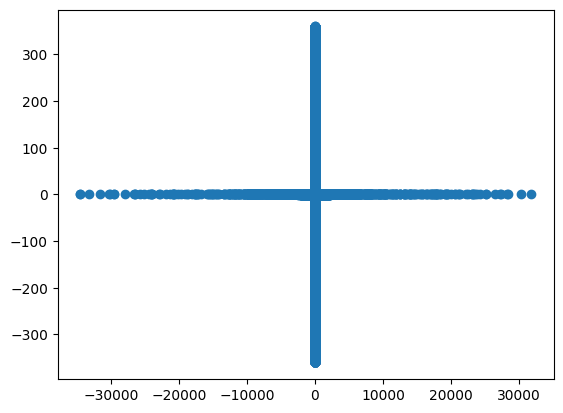

In [50]:
plt.scatter(_df['OD_diff'],_df['dir_diff'])

In [51]:
test.columns

Index(['gameId', 'playId', 'nflId', 'displayName', 'frameId', 'playDirection',
       'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'event', 'position',
       'pos_unique', 'CB1', 'SS1', 'NT1', 'CB2', 'QB1', 'CB3', 'DE1', 'G1',
       'FS1', 'DT1', 'DE2', 'T1', 'C1', 'WR1', 'OLB1', 'WR2', 'ILB1', 'G2',
       'RB1', 'TE1', 'T2', 'WR3', 'football', 'DT2', 'ILB2', 'OLB2', 'FS2',
       'FB1', 'NT2', 'TE2', 'T3', 'SS2', 'G3', 'DE3', 'CB4', 'tackle',
       'assist', 'pff_missedTackle', 'is_defense', 'ballCarrierId',
       'ballCarrierDisplayName', 'playDescription', 'quarter', 'down',
       'yardsToGo', 'gameClock', 'prePenaltyPlayResult',
       'playNullifiedByPenalty', 'absoluteYardlineNumber', 'offenseFormation',
       'defendersInTheBox', 'visitorTeamWinProbilityAdded', 'playType',
       'tackled_for_loss', 'ballCarrierDir', 'ballCarrierO', 'O_diff',
       'dir_diff', 'AOD', 'OD_diff'],
      dtype='object')

# Thoughts (11/12)

Today I played around with some feature engineering. My current thought process is that some of the biggest changes I would expect immediately preceding/during a tackle, particularly a tackle for loss, is:
- we should see generally see a more rapid acceleration of the ball carrier as they try to evade by quickly changing direction
- we may see the ball carriers orientation shift either towards or away from the tackler as they become more aware of the threat
- we may see the direction of travel adopt more orthogonal angles of travel according to `dir` as they attempt to evade
- there's a possibility that `o` and `dir` are unique features that may be important; it's also possible that they tell more unique information about TFLs becuase of their relationship

Based on these thoughts, I tried calculating a few different features:
- `AOD` which is the product of acceleration and orientation differences divided by the directional differences 
- `OD_diff`, which is the ratio of the differences between the player and the ball carrier's orientation and their direction of travel

I also think I need to rethink the calculation of `tackled_for_loss`, as it currently is assigning a yes value to all plays in which the play result is a loss of yardage, where it needs to assign the value of 1 to individuals credited with a tackle resulting in a loss of yardage in a particular frame.

Other thoughts:
- I'm not sure that I calculated `playType` correctly. I classified plays as either 'pass' or 'scramble' based on whether those words appeared in the `playDescription`, then classified all other plays as 'run'.


In [52]:
_df = test.copy()

In [53]:
_df['tackled_for_loss'] = 0
_df.loc[((_df['event'] == 'tackle') & (_df['tackle'] == 1) & (_df['prePenaltyPlayResult']<0)),'tackled_for_loss'] = 1
_df.loc[(_df['event']=='tackle') & (_df['tackle']==1),['event','tackle','prePenaltyPlayResult','tackled_for_loss']].sample(50)

,event,tackle,prePenaltyPlayResult,tackled_for_loss
2185861,tackle,1.0,9,0
6161316,tackle,1.0,14,0
38346,tackle,1.0,3,0
6655237,tackle,1.0,6,0
4597491,tackle,1.0,7,0
990417,tackle,1.0,31,0
3376775,tackle,1.0,3,0
2622114,tackle,1.0,21,0
6655230,tackle,1.0,6,0
3252056,tackle,1.0,6,0


In [54]:
_df2 = _df[['tackled_for_loss','tackle','playType','O_diff','dir_diff','AOD','OD_diff']]
_df2.groupby(['tackle','playType']).corr(method='spearman')

tackled_for_loss    O_diff  dir_diff  \
tackle playType                                                          
0.0    pass     tackled_for_loss               NaN       NaN       NaN   
                O_diff                         NaN  1.000000  0.376009   
                dir_diff                       NaN  0.376009  1.000000   
                AOD                            NaN -0.056110 -0.034967   
                OD_diff                        NaN -0.058324 -0.013005   
       run      tackled_for_loss               NaN       NaN       NaN   
                O_diff                         NaN  1.000000  0.435593   
                dir_diff                       NaN  0.435593  1.000000   
                AOD                            NaN -0.048574  0.035753   
                OD_diff                        NaN -0.060614  0.028597   
1.0    pass     tackled_for_loss               NaN       NaN       NaN   
                O_diff                         NaN  1.000000  0.383516   
                dir_diff                       NaN  0.383516  1.000000   
                AOD                            NaN  0.074280 -0.052329   
                OD_diff                        NaN  0.054480 -0.075041   
       run      tackled_for_loss          1.000000  0.011905  0.015651   
                O_diff                    0.011905  1.000000  0.388004   
                dir_diff                  0.015651  0.388004  1.000000   
                AOD                      -0.015042 -0.049723 -0.003462   
                OD_diff                  -0.017376 -0.074404 -0.011512   
       scramble tackled_for_loss               NaN       NaN       NaN   
                O_diff                         NaN  1.000000  0.461486   
                dir_diff                       NaN  0.461486  1.000000   
                AOD                            NaN -0.010105  0.023443   
                OD_diff                        NaN  0.017612  0.050696   

                                       AOD   OD_diff  
tackle playType                                       
0.0    pass     tackled_for_loss       NaN       NaN  
                O_diff           -0.056110 -0.058324  
                dir_diff         -0.034967 -0.013005  
                AOD               1.000000  0.950799  
                OD_diff           0.950799  1.000000  
       run      tackled_for_loss       NaN       NaN  
                O_diff           -0.048574 -0.060614  
                dir_diff          0.035753  0.028597  
                AOD               1.000000  0.897505  
                OD_diff           0.897505  1.000000  
1.0    pass     tackled_for_loss       NaN       NaN  
                O_diff            0.074280  0.054480  
                dir_diff         -0.052329 -0.075041  
                AOD               1.000000  0.952153  
                OD_diff           0.952153  1.000000  
       run      tackled_for_loss -0.015042 -0.017376  
                O_diff           -0.049723 -0.074404  
                dir_diff         -0.003462 -0.011512  
                AOD               1.000000  0.910136  
                OD_diff           0.910136  1.000000  
       scramble tackled_for_loss       NaN       NaN  
                O_diff           -0.010105  0.017612  
                dir_diff          0.023443  0.050696  
                AOD               1.000000  0.957093  
                OD_diff           0.957093  1.000000